# Airbnb Listings & Reviews

Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read dataset

In [2]:
df_listings=pd.read_csv("/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",index_col=None,encoding="latin1")

In [3]:
df_listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

# Clean data

In [5]:
df_listings['host_since']=pd.to_datetime(df_listings['host_since'])

# Question1
1. spot any major differences in the Airbnb market between cities.

Text(0.5, 1.0, 'Number of Hosts in cities on Airbnb')

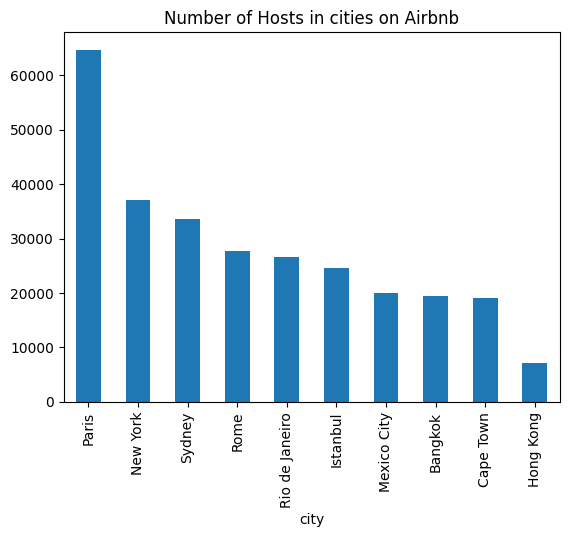

In [6]:
pd.pivot_table(data=df_listings,index='city',values='listing_id',aggfunc='count').sort_values(by='listing_id', ascending=False).plot.bar()
plt.legend().set_visible(False)
plt.title('Number of Hosts in cities on Airbnb')

In order, the cities with the highest number of hosts on Airbnb are Paris, New York, Sydney, Rome, Rio de Janeiro, Istanbul, Mexico City, Bangkok, Cape Town, and Hong Kong.

Text(0, 0.5, 'Price')

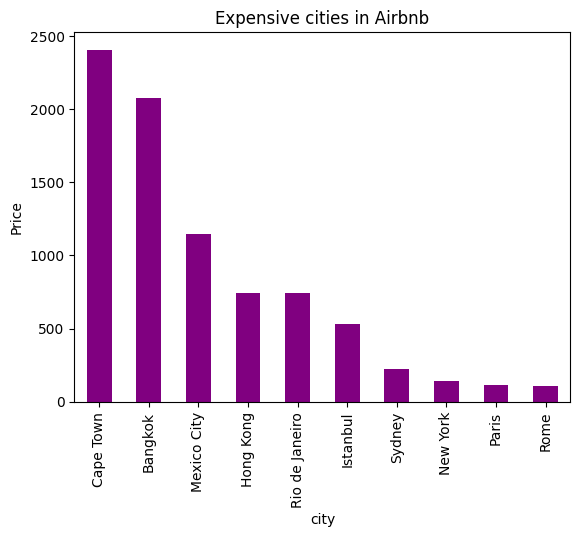

In [7]:
df_listings.groupby('city')['price'].mean().sort_values(ascending=False).plot.bar(color='purple')
plt.title('Expensive cities in Airbnb')
plt.ylabel('Price')

In order, the most expensive cities on Airbnb are Cape Town, Bangkok, Mexico City, Hong Kong, Rio de Janeiro, Istanbul, Sydney, New York, Paris, and Rome.

<Figure size 1600x800 with 0 Axes>

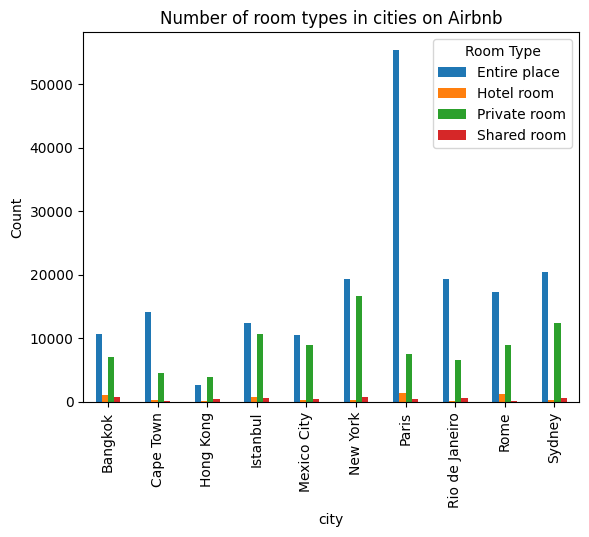

In [8]:
plt.figure(figsize=(16, 8))
pd.pivot_table(data=df_listings, index='city', values='listing_id',columns='room_type',aggfunc='count').plot.bar()
plt.ylabel('Count')
plt.title('Number of room types in cities on Airbnb')
plt.legend(title='Room Type')
plt.show()

In all cities (except Hong Kong), 'Entire place' and 'Private' rooms are the most common types of accommodations on Airbnb​.

Text(0.5, 1.0, 'Superhost status in cities on Airbnb')

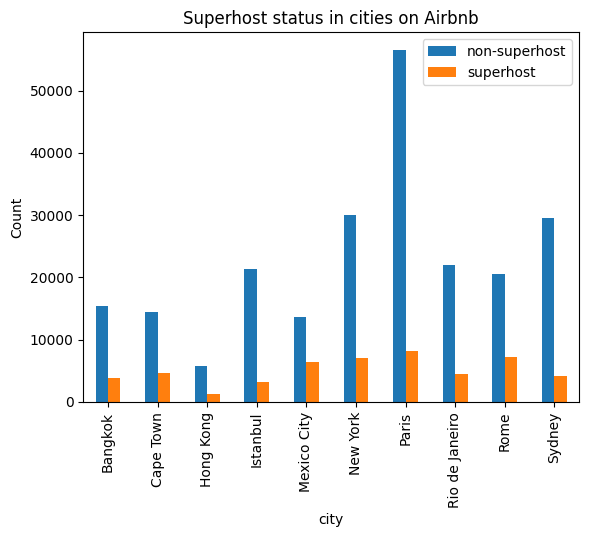

In [9]:
pd.pivot_table(data=df_listings, index='city', values='listing_id',columns='host_is_superhost',aggfunc='count').plot.bar()
plt.ylabel('Count')
plt.legend(['non-superhost','superhost'])
plt.title('Superhost status in cities on Airbnb')

In all cities, the number of superhosts is lower than the number of non-superhosts.

### Question1: spot any major differences in the Airbnb market between cities:
1.In order, the cities with the highest number of hosts on Airbnb are Paris, New York, Sydney, Rome, Rio de Janeiro, Istanbul, Mexico City, Bangkok, Cape Town, and Hong Kong.<br>
2. In order, the most expensive cities on Airbnb are Cape Town, Bangkok, Mexico City, Hong Kong, Rio de Janeiro, Istanbul, Sydney, New York, Paris, and Rome.<br>
3. In all countries (except Hong Kong), 'Entire place' and 'Private' rooms are the most common types of accommodations on Airbnb.<br>
4. In all cities, the number of superhosts is lower than the number of non-superhosts.

# Question2
2. Determind which attributes have the biggest influence in price.

Text(0.5, 1.0, 'Distribution of price')

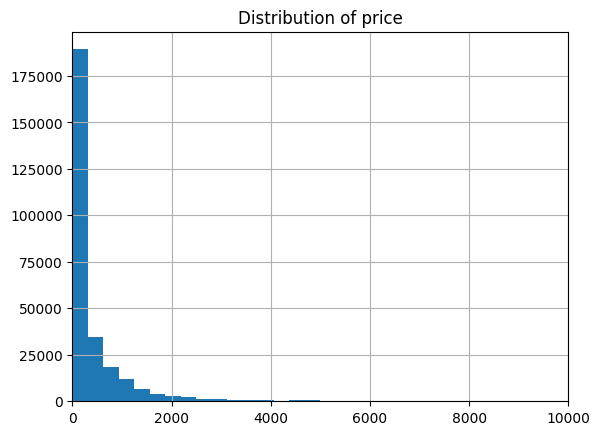

In [10]:
df_listings['price'].hist(bins=2000)
#because toomany af price are under 10000
plt.xlim(0,10000)
plt.title('Distribution of price')

In [11]:
df_listings['price'].value_counts()

price
100      6882
50       6438
70       6207
60       6172
80       6148
         ... 
4941        1
2055        1
2751        1
2553        1
36473       1
Name: count, Length: 5194, dtype: int64

The majority of hosts have prices ranging between 0 and 4000.

In [12]:
df_listings.select_dtypes(include='number').corr()['price']

listing_id                     0.011471
host_id                        0.011795
host_response_rate            -0.000697
host_acceptance_rate          -0.039315
host_total_listings_count      0.009907
latitude                      -0.099278
longitude                      0.019608
accommodates                   0.146327
bedrooms                       0.143307
price                          1.000000
minimum_nights                 0.006344
maximum_nights                -0.000442
review_scores_rating           0.015048
review_scores_accuracy        -0.000693
review_scores_cleanliness      0.024328
review_scores_checkin         -0.000243
review_scores_communication   -0.003262
review_scores_location        -0.000609
review_scores_value            0.001572
Name: price, dtype: float64

There isn't any strongh relation between price and any numeric features. so we should find relation between price and object columns

In [13]:
selected_columns = df_listings.select_dtypes(include=['object', 'datetime64'])
selected_columns.columns

Index(['name', 'host_since', 'host_location', 'host_response_time',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'district', 'city', 'property_type', 'room_type',
       'amenities', 'instant_bookable'],
      dtype='object')

([<matplotlib.axis.XTick at 0x7cb53aa42230>,
 [Text(0, 0, 'Superhost'), Text(1, 0, 'non-superhost')])

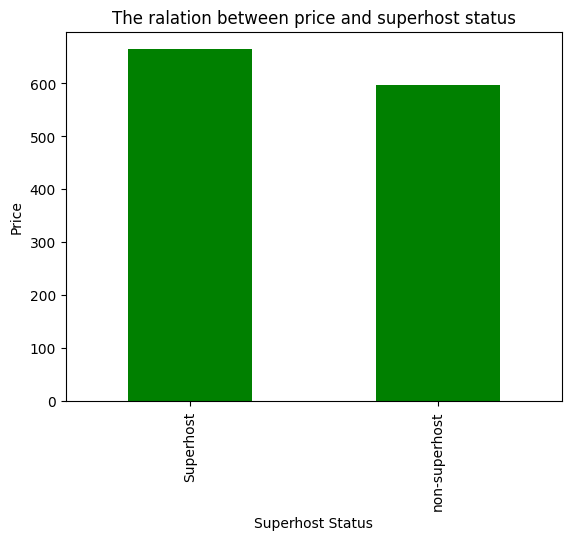

In [14]:
df_listings.groupby(['host_is_superhost'])['price'].mean().sort_values(ascending=False).plot.bar(color='green')
plt.title('The ralation between price and superhost status')
plt.ylabel('Price')
plt.xlabel('Superhost Status')
plt.xticks([0,1],['Superhost','non-superhost'])

Superhosts tend to be more expensive.

Text(0.5, 0, 'how long the Host takes to respond')

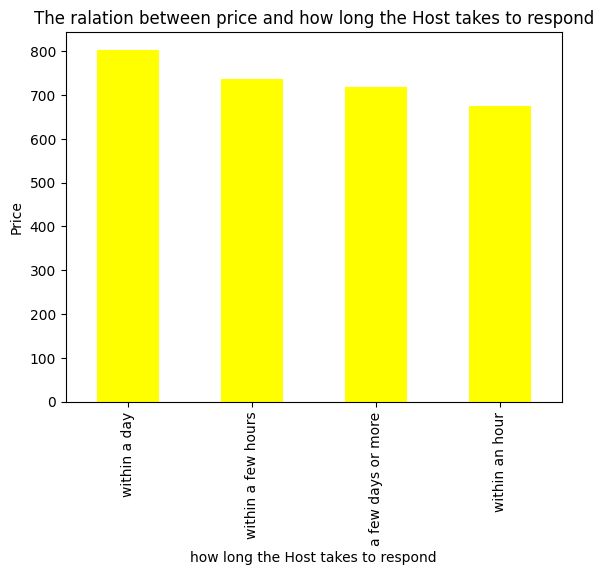

In [15]:
df_listings.groupby(['host_response_time'])['price'].mean().sort_values(ascending=False).plot.bar(color='yellow')
plt.title('The ralation between price and how long the Host takes to respond')
plt.ylabel('Price')
plt.xlabel('how long the Host takes to respond')

Hosts who respond to requests within a day are typically more expensive.

([<matplotlib.axis.XTick at 0x7cb53a917550>,
 [Text(0, 0, "Don't have profile pic"), Text(1, 0, 'Has profile  pic')])

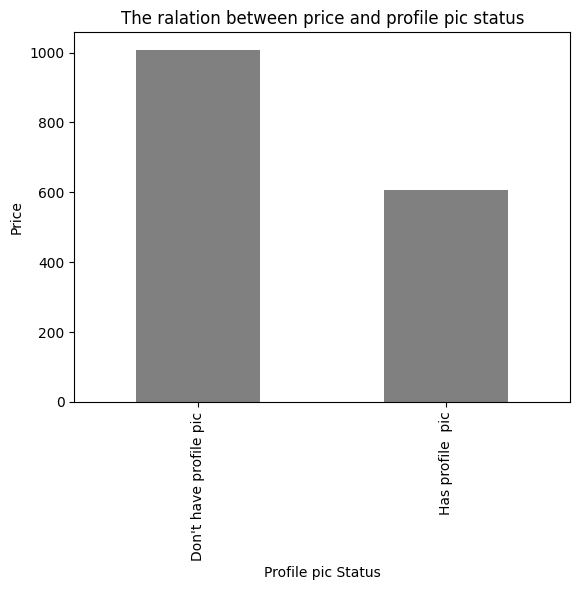

In [16]:
df_listings.groupby(['host_has_profile_pic'])['price'].mean().sort_values(ascending=False).plot.bar(color='gray')
plt.title('The ralation between price and profile pic status')
plt.ylabel('Price')
plt.xlabel('Profile pic Status')
plt.xticks([0,1],['Don\'t have profile pic','Has profile  pic'])

([<matplotlib.axis.XTick at 0x7cb53a7980d0>,
 [Text(1, 0, "Don't have profile pic"), Text(0, 0, 'Has profile pic')])

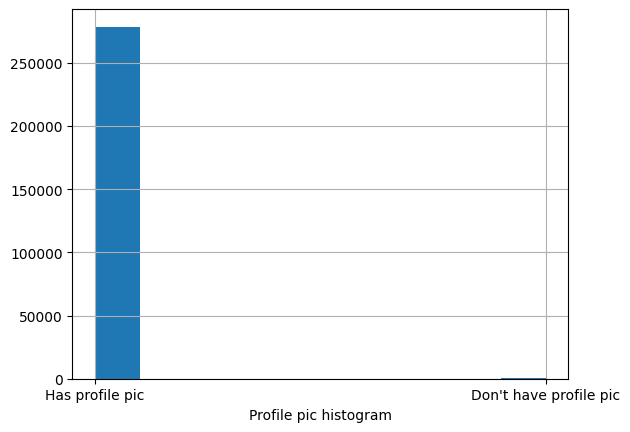

In [17]:
df_listings['host_has_profile_pic'].hist()
plt.xlabel('Profile pic histogram')
plt.xticks([1,0],['Don\'t have profile pic','Has profile pic'])

Hosts without a profile picture are generally more expensive. However, most hosts on Airbnb have pictures.

([<matplotlib.axis.XTick at 0x7cb53a7fb490>,
 [Text(0, 0, "Don't have verified id"), Text(1, 0, 'Has verified id')])

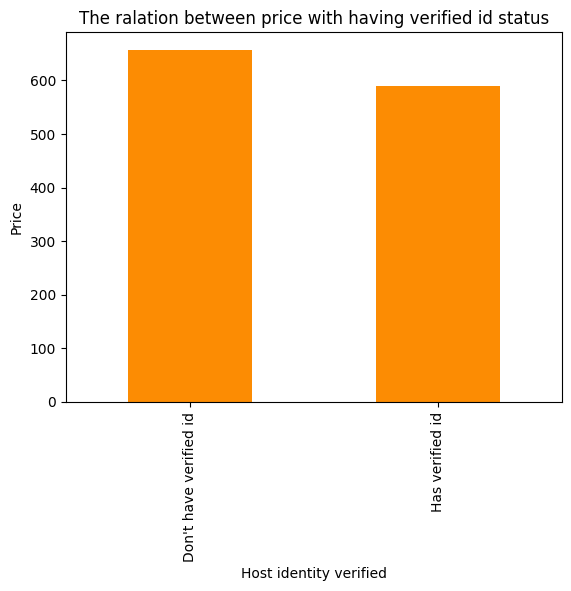

In [18]:
df_listings.groupby(['host_identity_verified'])['price'].mean().sort_values(ascending=False).plot.bar(color='#fc8c03')
plt.title('The ralation between price with having verified id status')
plt.ylabel('Price')
plt.xlabel('Host identity verified')
plt.xticks([0,1],['Don\'t have verified id','Has verified id'])

Hosts without a verified ID tend to be more expensive.

Text(0.5, 0, 'Host property type')

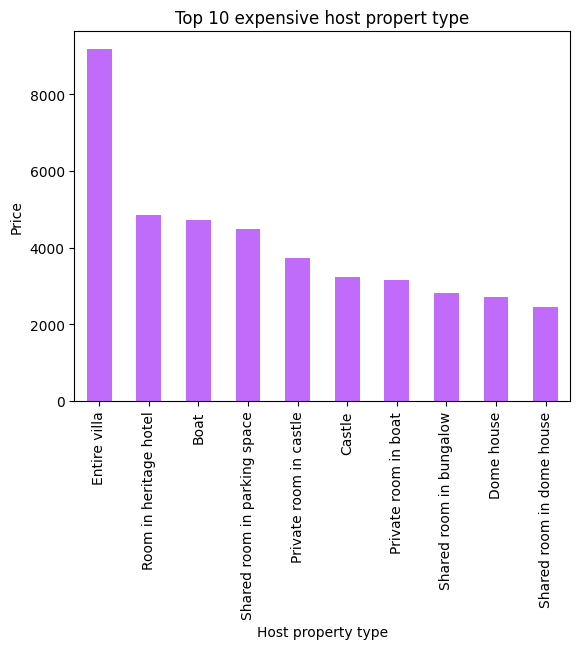

In [19]:
df_listings.groupby(['property_type'])['price'].mean().sort_values(ascending=False)[:10].plot.bar(color='#c16bfa')
plt.title('Top 10 expensive host propert type')
plt.ylabel('Price')
plt.xlabel('Host property type')

Entire villas, rooms in heritage hotels, and boats are the most expensive types of hosts on Airbnb.

Text(0.5, 0, 'Room type')

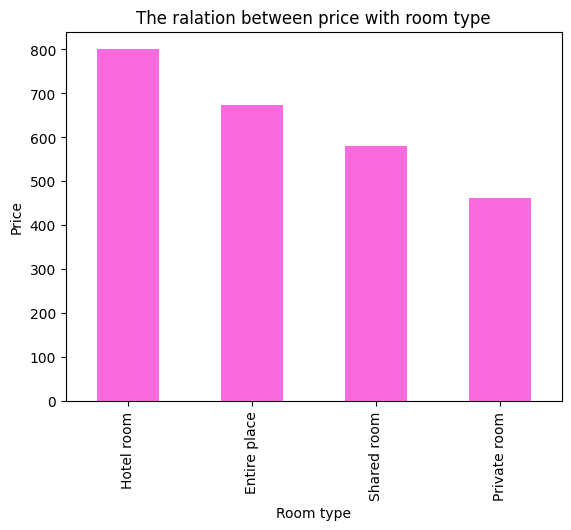

In [20]:
df_listings.groupby(['room_type'])['price'].mean().sort_values(ascending=False).plot.bar(color='#fa6be0')
plt.title('The ralation between price with room type')
plt.ylabel('Price')
plt.xlabel('Room type')

Hotel rooms, entire places, shared rooms, and private rooms are listed from most expensive to least expensive.

([<matplotlib.axis.XTick at 0x7cb53a58b970>,
 [Text(0, 0, 'bookable'), Text(1, 0, 'non-bookable')])

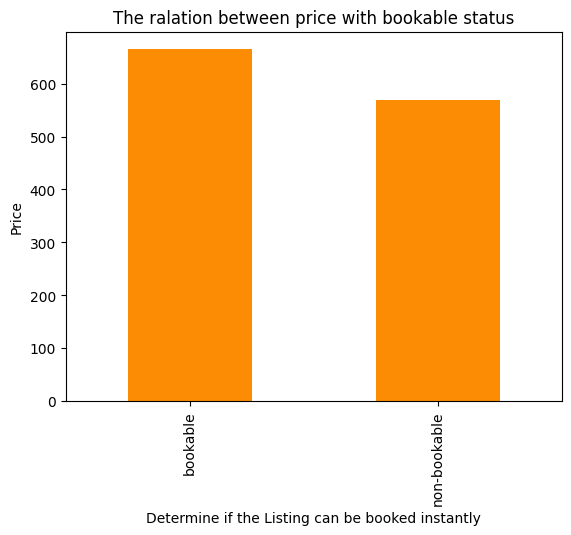

In [21]:
df_listings.groupby(['instant_bookable'])['price'].mean().sort_values(ascending=False).plot.bar(color='#fc8c03')
plt.title('The ralation between price with bookable status')
plt.ylabel('Price')
plt.xlabel('Determine if the Listing can be booked instantly')
plt.xticks([0,1],['bookable','non-bookable'])

Bookable host are more expensive than non-bookable hosts!

### Question2: Determind which attributes have the biggest influence in price:
1. The majority of hosts have prices ranging between 0 and 4000. <br>
2. Superhosts tend to be more expensive.<br>
3. Hosts who respond to requests within a day are typically more expensive.<br>
4. Hosts without a profile picture are generally more expensive. However, most hosts on Airbnb have pictures.<br>
5. Hosts without a verified ID tend to be more expensive.<br>
6. Entire villas, rooms in heritage hotels, and boats are the most expensive types of hosts on Airbnb.<br>
7. Hotel rooms, entire places, shared rooms, and private rooms are listed from most expensive to least expensive.<br>
8. Bookable hosts are generally more expensive than non-bookable hosts.<br>

# Question 3
3. identify any trends or seasonality in the review data.

In [22]:
df_reviews=pd.read_csv("/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [23]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB


In [24]:
df_reviews['date']=pd.to_datetime(df_reviews['date'])

([<matplotlib.axis.XTick at 0x7cb518405d20>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

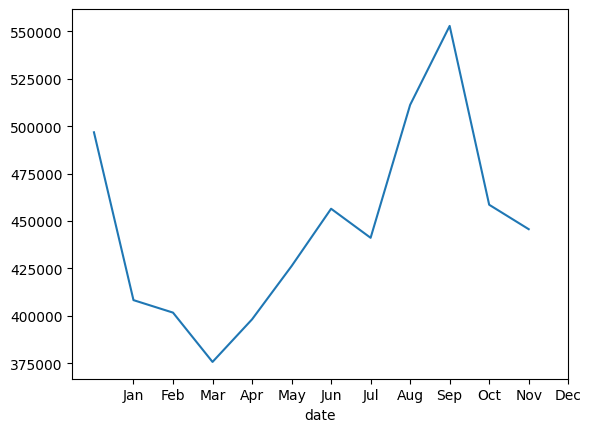

In [25]:
reviews_over_time=df_reviews.groupby(df_reviews['date'].dt.strftime('%m'))['reviewer_id'].count()
reviews_over_time.plot()
plt.xticks(range(1,13),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

### Question3: Identify any trends or seasonality in the review data:
There is seasonality in the review data, with more reviews occurring from August to October than in other months.


# Question 4
4. determind which city offers a better value for travel.

According to what explored for question1 Rome is the cheapest city for travel.

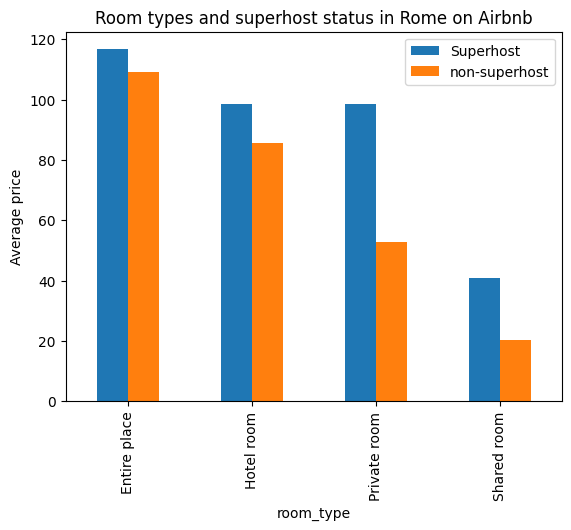

In [26]:
# plt.figure(figsize=(16, 8))
pd.pivot_table(data=df_listings[df_listings['city']=='Rome'], index='room_type', values='price',columns='host_is_superhost',aggfunc='mean').plot.bar()
plt.ylabel('Average price')
plt.title('Room types and superhost status in Rome on Airbnb')
plt.legend(labels=['Superhost','non-superhost'])
plt.show()

### Question4: determind which city offers a better value for travel:
Depending on the budget, the destination may vary; however, non-superhost shared rooms in Rome are the most affordable option for travel.